In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats

In [2]:
pd.set_option("display.max_rows", 60)
pd.set_option("display.max_columns", 60)

In [3]:
df = pd.read_csv("../parkinsons.data")

In [4]:
df.shape

(195, 24)

In [5]:
#check for any None values
df.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [6]:
#check for duplicate rows
df.duplicated().value_counts()

False    195
dtype: int64

In [7]:
#check status column if it's binary
df["status"].unique()

array([1, 0])

In [8]:
#set index as "name"
df.set_index("name", inplace=True)

It is 2D
It is 1D


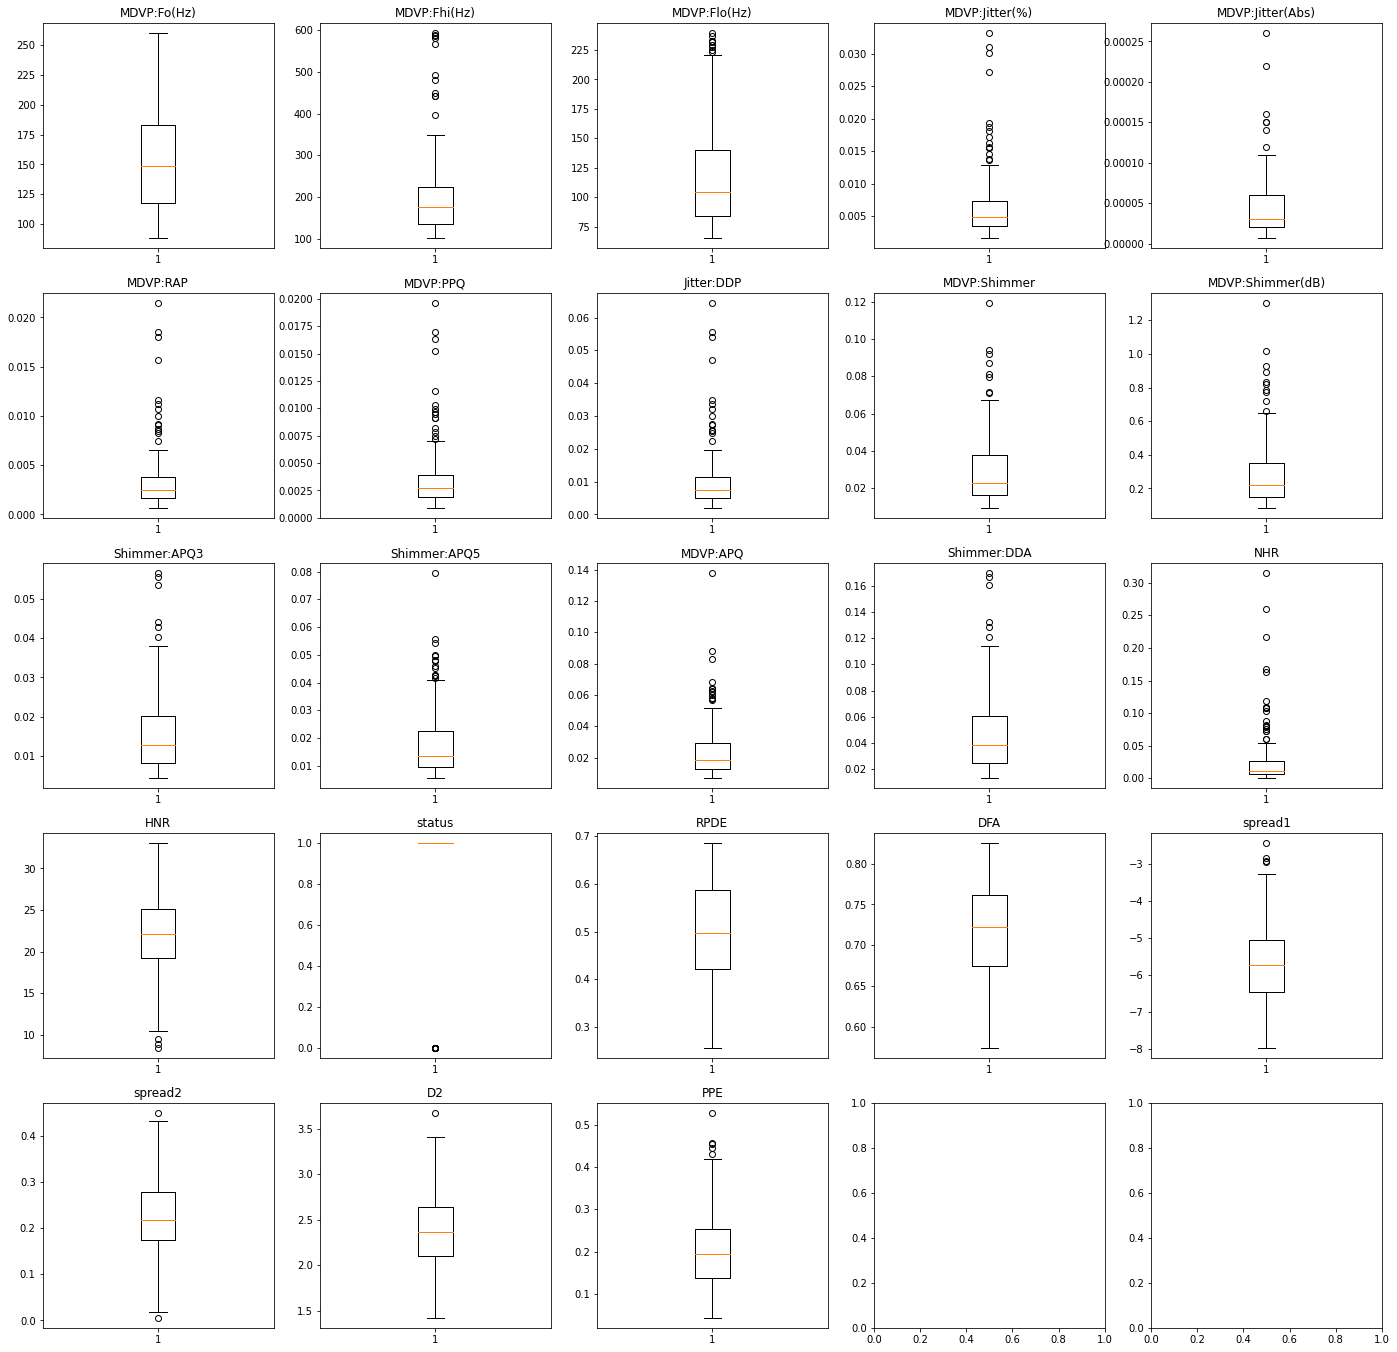

In [9]:
#plot outliers for each column
colms = df.columns
fig, axes = plt.subplots(5,5, figsize=(24,24))
print(f"It is {axes.ndim}D")
axes = axes.flatten()
print(f"It is {axes.ndim}D")
for i in range(len(colms)):
    axes[i].boxplot(df.iloc[:,i])
    axes[i].set_title(colms[i])

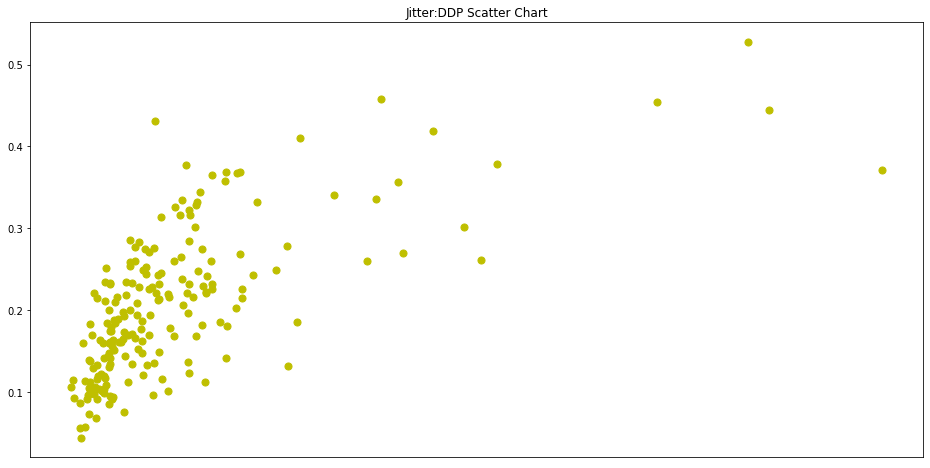

In [10]:
#scatter plot for displaying outliers
plt.figure(figsize=(16,8))
plt.scatter(df["Jitter:DDP"], df["PPE"], c="y", s=50)
plt.title("Jitter:DDP Scatter Chart")
plt.xticks([])
plt.show()

In [11]:
#find outliners
abs_z_score = np.abs(stats.zscore(df)) #get absolute z score
filt = (abs_z_score < 3).all(axis=1) #filter where abs_z_score is smaller than 3
df = df[filt] #remove outliners
df.shape

(181, 23)

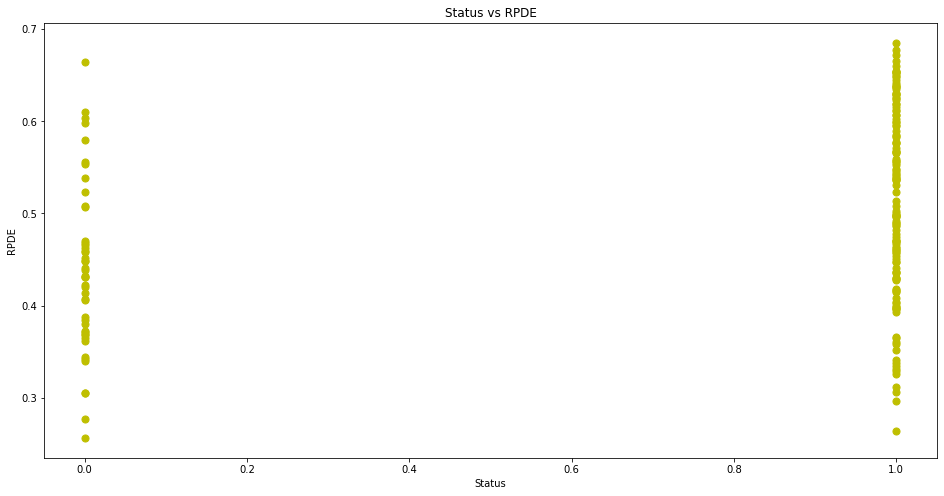

In [12]:
#correlation between RPDE and D2
plt.figure(figsize=(16,8))
plt.scatter(df["status"], df["RPDE"], c="y", s=50)
plt.title("Status vs RPDE")
plt.xlabel("Status")
plt.ylabel("RPDE")
plt.show()

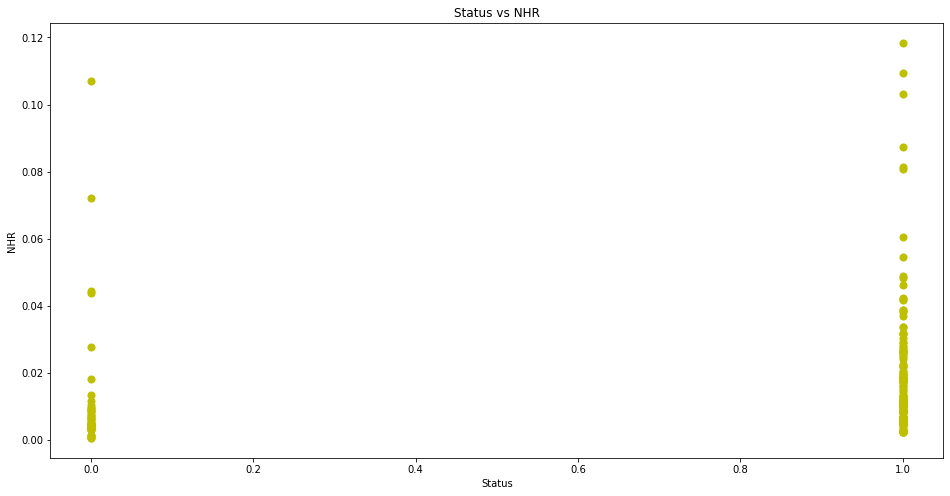

In [13]:
#correlation between NHR and HNR
plt.figure(figsize=(16,8))
plt.scatter(df["status"], df["NHR"], c="y", s=50)
plt.title("Status vs NHR")
plt.xlabel("Status")
plt.ylabel("NHR")
plt.show()

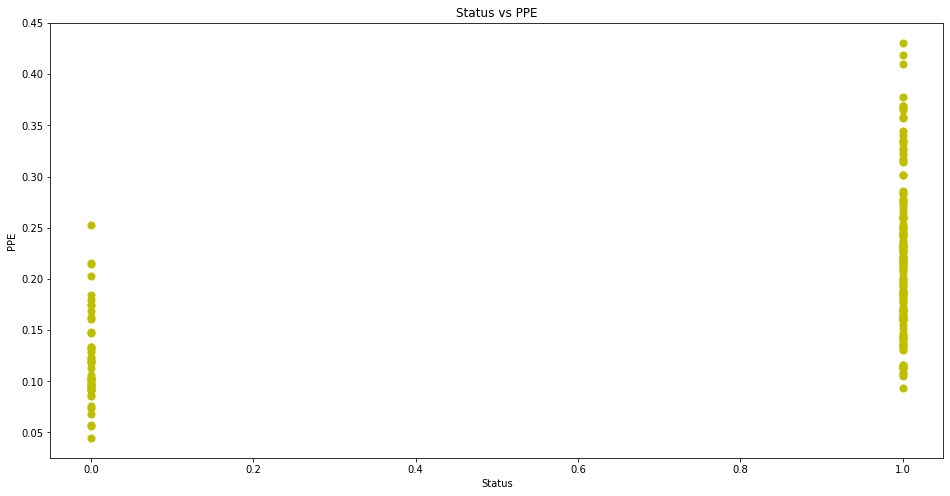

In [14]:
#correlation between Status and Shimmer:DDA
plt.figure(figsize=(16,8))
plt.scatter(df["status"], df["PPE"], c="y", s=50)
plt.title("Status vs PPE")
plt.xlabel("Status")
plt.ylabel("PPE")
plt.show()

In [15]:
#pairwise correlation between each column. Positive correlation means both attribute behaves similarly 
#while negative correlation means opposite.
df.corr()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
MDVP:Fo(Hz),1.000000,0.714783,0.585996,-0.239872,-0.565208,-0.165800,-0.250934,-0.165863,-0.182234,-0.172920,-0.160556,-0.156241,-0.201166,-0.160579,-0.049571,0.112500,-0.419793,-0.392915,-0.515281,-0.500816,-0.304852,0.162211,-0.479673
MDVP:Fhi(Hz),0.714783,1.000000,0.212441,-0.088162,-0.348179,-0.082794,-0.122340,-0.082883,-0.138057,-0.113599,-0.137330,-0.122378,-0.128309,-0.137364,0.072232,0.032922,-0.231924,-0.197976,-0.497880,-0.231088,-0.043591,0.252176,-0.223036
MDVP:Flo(Hz),0.585996,0.212441,1.000000,-0.326796,-0.445311,-0.264680,-0.266525,-0.264689,-0.275843,-0.269825,-0.261642,-0.227201,-0.288422,-0.261632,-0.278741,0.319173,-0.417493,-0.430923,-0.106437,-0.498078,-0.313645,-0.169843,-0.457354
MDVP:Jitter(%),-0.239872,-0.088162,-0.326796,1.000000,0.897788,0.976147,0.960151,0.976165,0.617560,0.665638,0.580329,0.600601,0.643526,0.580324,0.761398,-0.678431,0.314180,0.354365,0.228613,0.666869,0.357180,0.344008,0.699707
MDVP:Jitter(Abs),-0.565208,-0.348179,-0.445311,0.897788,1.000000,0.852486,0.884269,0.852518,0.562436,0.592369,0.532114,0.545681,0.562726,0.532125,0.600978,-0.573750,0.388631,0.448475,0.374590,0.741936,0.392793,0.175917,0.770175
MDVP:RAP,-0.165800,-0.082794,-0.264680,0.976147,0.852486,1.000000,0.934786,0.999999,0.610330,0.655556,0.581222,0.588814,0.626400,0.581210,0.767612,-0.682393,0.308013,0.324205,0.189231,0.601413,0.266309,0.347098,0.625869
MDVP:PPQ,-0.250934,-0.122340,-0.266525,0.960151,0.884269,0.934786,1.000000,0.934801,0.655651,0.703744,0.610888,0.677234,0.672882,0.610891,0.671131,-0.664027,0.323617,0.313843,0.333124,0.693831,0.363347,0.299406,0.753065
Jitter:DDP,-0.165863,-0.082883,-0.264689,0.976165,0.852518,0.999999,0.934801,1.000000,0.610304,0.655522,0.581202,0.588806,0.626386,0.581190,0.767652,-0.682403,0.308042,0.324133,0.189162,0.601506,0.266286,0.347106,0.625969
MDVP:Shimmer,-0.182234,-0.138057,-0.275843,0.617560,0.562436,0.610330,0.655651,0.610304,1.000000,0.985599,0.986748,0.981222,0.953641,0.986749,0.589645,-0.784880,0.378893,0.440120,0.191459,0.558631,0.390744,0.426419,0.586912
MDVP:Shimmer(dB),-0.172920,-0.113599,-0.269825,0.665638,0.592369,0.655556,0.703744,0.655522,0.985599,1.000000,0.962414,0.969478,0.957226,0.962416,0.623121,-0.781910,0.367201,0.410917,0.195797,0.557021,0.391539,0.427541,0.586647


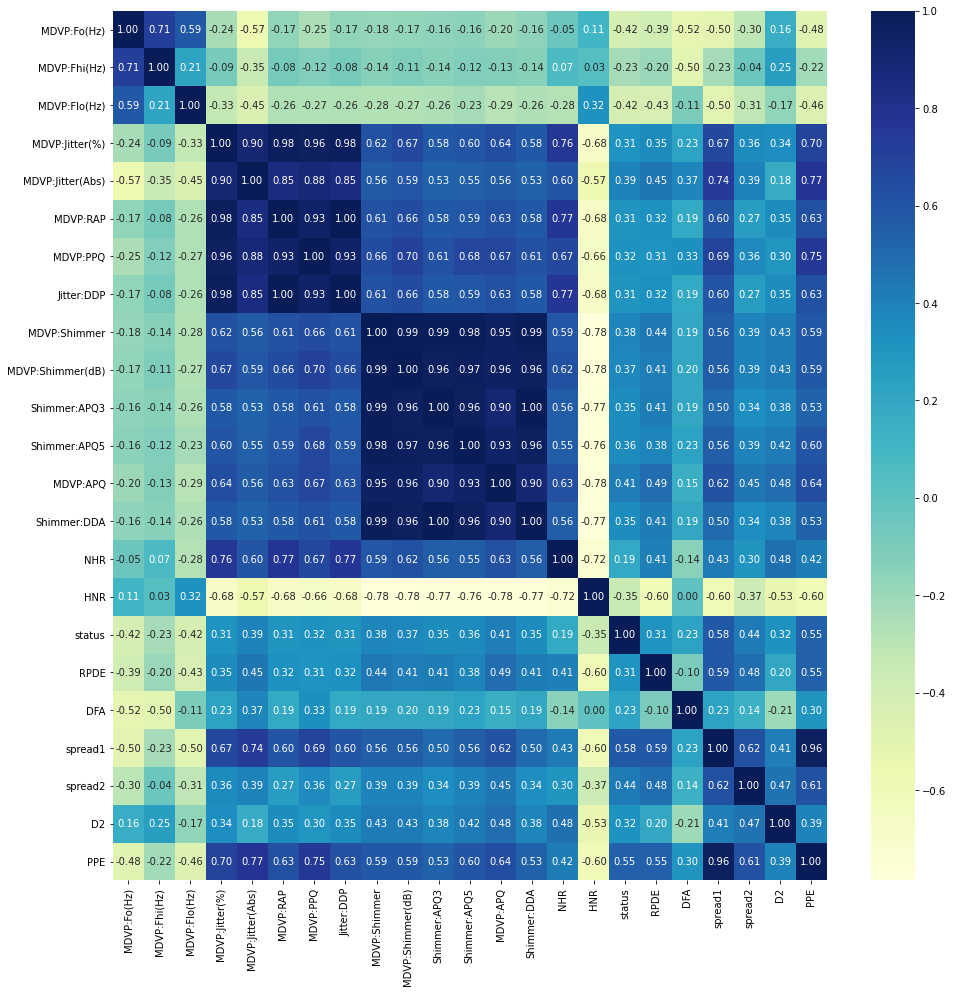

In [16]:
#seaborn heatmap by dfcorr() Positive values and darker colors means positive correlation while negative values lighter colors means negative correlation
plt.figure(figsize=(16,16))
sns.heatmap(df.corr(), fmt='.2f', annot=True, cmap="YlGnBu");

In [17]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000
mean,154.676630,183.737436,116.235254,0.005457,0.000039,0.002839,0.003034,0.008516,0.027603,0.258298,0.014602,0.016667,0.022114,0.043807,0.018116,22.310497,0.745856,0.493856,0.718806,-5.786743,0.221630,2.349643,0.198168
std,41.982512,60.865252,43.971398,0.002959,0.000024,0.001730,0.001769,0.005187,0.015240,0.150077,0.008382,0.009944,0.012561,0.025146,0.020653,3.919846,0.436586,0.104362,0.055225,1.003159,0.081040,0.355373,0.080944
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,0.004550,0.005700,0.007190,0.013640,0.000650,11.744000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.274000,133.374000,83.961000,0.003390,0.000020,0.001650,0.001840,0.004960,0.016420,0.145000,0.008120,0.009560,0.013010,0.024360,0.005780,19.517000,0.000000,0.417356,0.676066,-6.486822,0.173319,2.080121,0.134120
50%,149.689000,166.607000,104.315000,0.004760,0.000030,0.002370,0.002580,0.007100,0.022930,0.210000,0.012680,0.013410,0.017710,0.038040,0.010700,22.244000,1.000000,0.487407,0.722356,-5.783272,0.212294,2.344336,0.188180
75%,183.520000,217.455000,135.041000,0.006940,0.000050,0.003680,0.003750,0.011050,0.035270,0.334000,0.018060,0.019940,0.028090,0.054170,0.021830,25.197000,1.000000,0.583390,0.761255,-5.198864,0.266892,2.555477,0.244512
max,260.105000,450.247000,239.170000,0.018720,0.000120,0.010750,0.011540,0.032250,0.079590,0.784000,0.044210,0.049620,0.068240,0.132620,0.118430,33.047000,1.000000,0.685151,0.825288,-2.929379,0.434326,3.317586,0.430788


### **Model_selection**
- Model_selection methods are used for setting a blueprint to analyze data from an existing data. <br>
- **train_test_split method** splits arrays or matrices into random train and test subsets: <br>
&emsp;*arrays = feature and target values <br>
&emsp;test_size = to specify size of the test subset <br>
&emsp;random_state = takes any integer to make train_test_split always deterministic. <br>
- **GridSearchCV** helps to loop through specified parameters and fit the model on the training set. <br>
&emsp;estimator = ML object. <br>
&emsp;cv = number of cross validation. <br>
&emsp;pram_grid = specify which parameters and their values to test.
### **Preprocessing**
- Preprocessing methods are used to transform raw feature vectors into a representation that is more suitable for the estimators (ML models). <br>
- **StandardScaler** used to rescale our data. Processes each value with this function (X - np.mean(X)) / np.std(X) <br>
### **Pipeline**
- Pipeline combines transformer (StandardScaler) and estimator (ML models) together. It also prevents data leakage.

In [18]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [19]:
# X: features, y:target
X = df.drop(columns=["status"]).values
y = df["status"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11022000)

### **Support Vector Machine**
- Support Vector Machine is a linear model for classification and regression problems. The algorithm creates a line or a hyperplane which separates the data into classes.

In [20]:
from sklearn.svm import SVC

In [21]:
# scale the data with StandardScaler()
svm_pipe = Pipeline([("scale", StandardScaler()), ("model", SVC())])
svm_pipe.fit(X_train, y_train)
svm_pipe.score(X_test, y_test)*100

90.9090909090909

### **Logistic Regression**
- Logistic regression is used to describe data and to explain the relationship between one dependent binary (1 or 0, true or false) variable, in our case it is the "status" column, and independent variables.

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
lr_pipe = Pipeline([("scale", StandardScaler()), ("model", LogisticRegression())])
lr_pipe.fit(X_train, y_train)
lr_pipe.score(X_test, y_test)*100

85.45454545454545

### **KNeighbors Classifier**
- KNN works by finding the distances between a query and all the examples in the data and selecting the specified number examples closest to the query.

In [24]:
from sklearn.neighbors import KNeighborsClassifier

In [25]:
kn_pipe = Pipeline([("scale", StandardScaler()), ("model", KNeighborsClassifier())])
search = GridSearchCV(estimator=kn_pipe, cv=5, param_grid={"model__n_neighbors": np.arange(1,10)})
search.fit(X_train, y_train)
pd.DataFrame(search.cv_results_) # gives statistics for each cross validation and parameters.

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001436,0.000551,0.002023,0.000676,1,{'model__n_neighbors': 1},0.923077,0.92,0.76,0.88,0.92,0.880615,0.062376,3
1,0.000993,0.000096,0.001678,0.000371,2,{'model__n_neighbors': 2},0.846154,0.92,0.80,0.92,0.80,0.857231,0.053951,6
2,0.000843,0.000057,0.001364,0.000231,3,{'model__n_neighbors': 3},0.923077,0.92,0.84,0.88,0.92,0.896615,0.032482,1
3,0.000742,0.000024,0.001182,0.000046,4,{'model__n_neighbors': 4},0.846154,0.88,0.84,0.92,0.88,0.873231,0.028693,4
4,0.000732,0.000011,0.001184,0.000041,5,{'model__n_neighbors': 5},0.884615,0.84,0.88,0.88,0.92,0.880923,0.025365,2
5,0.000760,0.000054,0.001114,0.000020,6,{'model__n_neighbors': 6},0.846154,0.84,0.84,0.92,0.92,0.873231,0.038253,4
6,0.000709,0.000026,0.001145,0.000047,7,{'model__n_neighbors': 7},0.884615,0.80,0.80,0.80,0.84,0.824923,0.033627,8
7,0.000718,0.000052,0.001115,0.000029,8,{'model__n_neighbors': 8},0.923077,0.84,0.84,0.88,0.80,0.856615,0.041765,7
8,0.000741,0.000082,0.001115,0.000020,9,{'model__n_neighbors': 9},0.807692,0.84,0.80,0.76,0.76,0.793538,0.030497,9


In [26]:
kn_mod = search.best_estimator_ # picks the model with the mean_test_score 
kn_mod.score(X_test, y_test)*100

94.54545454545455

### Decision Tree Classifier
- Decision Tree Classifier creates a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.

In [27]:
from sklearn.tree import DecisionTreeClassifier

In [28]:
dt_pipe = Pipeline([("scale", StandardScaler()), ("model", DecisionTreeClassifier())])
dt_pipe.fit(X_train, y_train)
dt_pipe.score(X_test, y_test)*100

80.0

### **Random Forest Classifier**
- The Random Forest Classifier is a set of decision trees from randomly selected subset of training set.

In [29]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
rf_pipe = Pipeline([("scale", StandardScaler()), ("model", RandomForestClassifier())])
rf_pipe.fit(X_train, y_train)
rf_pipe.score(X_test, y_test)*100

94.54545454545455